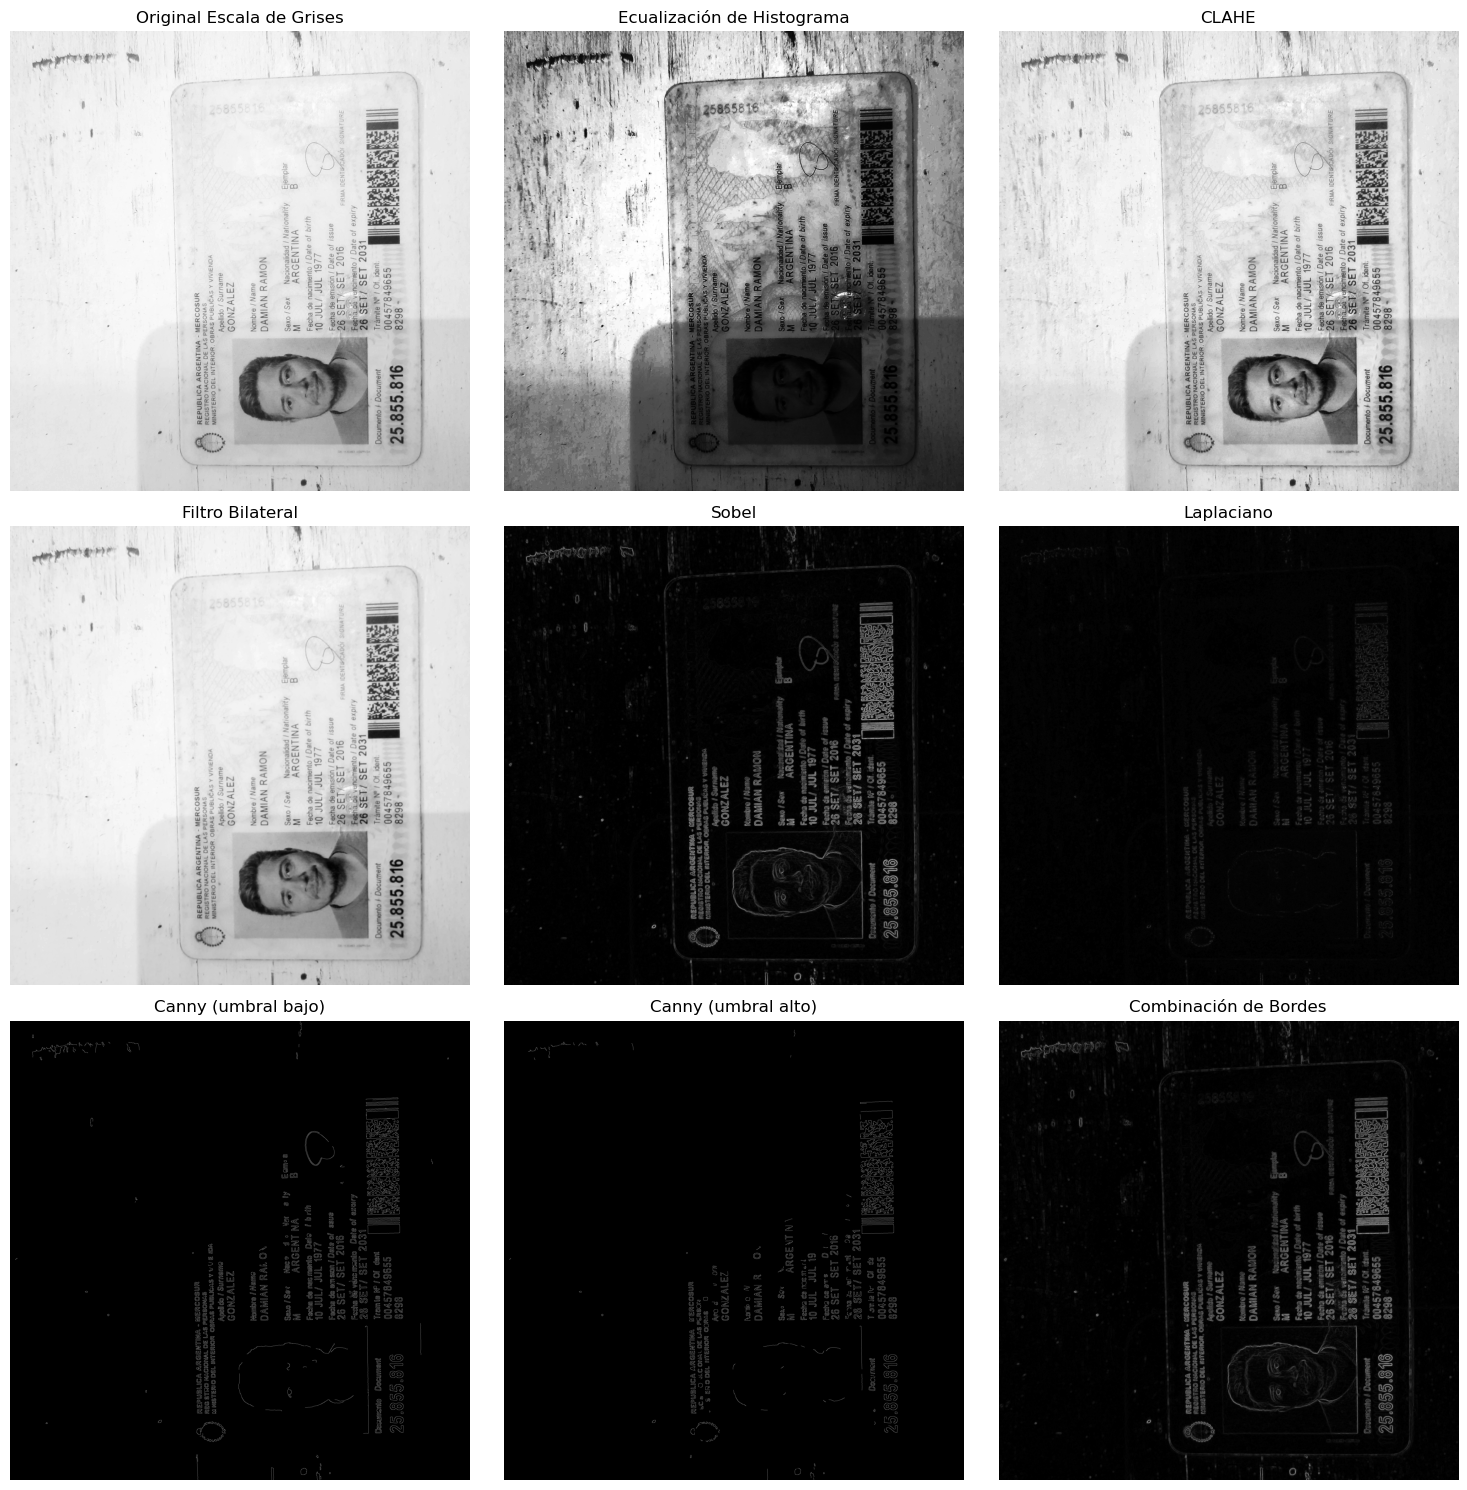

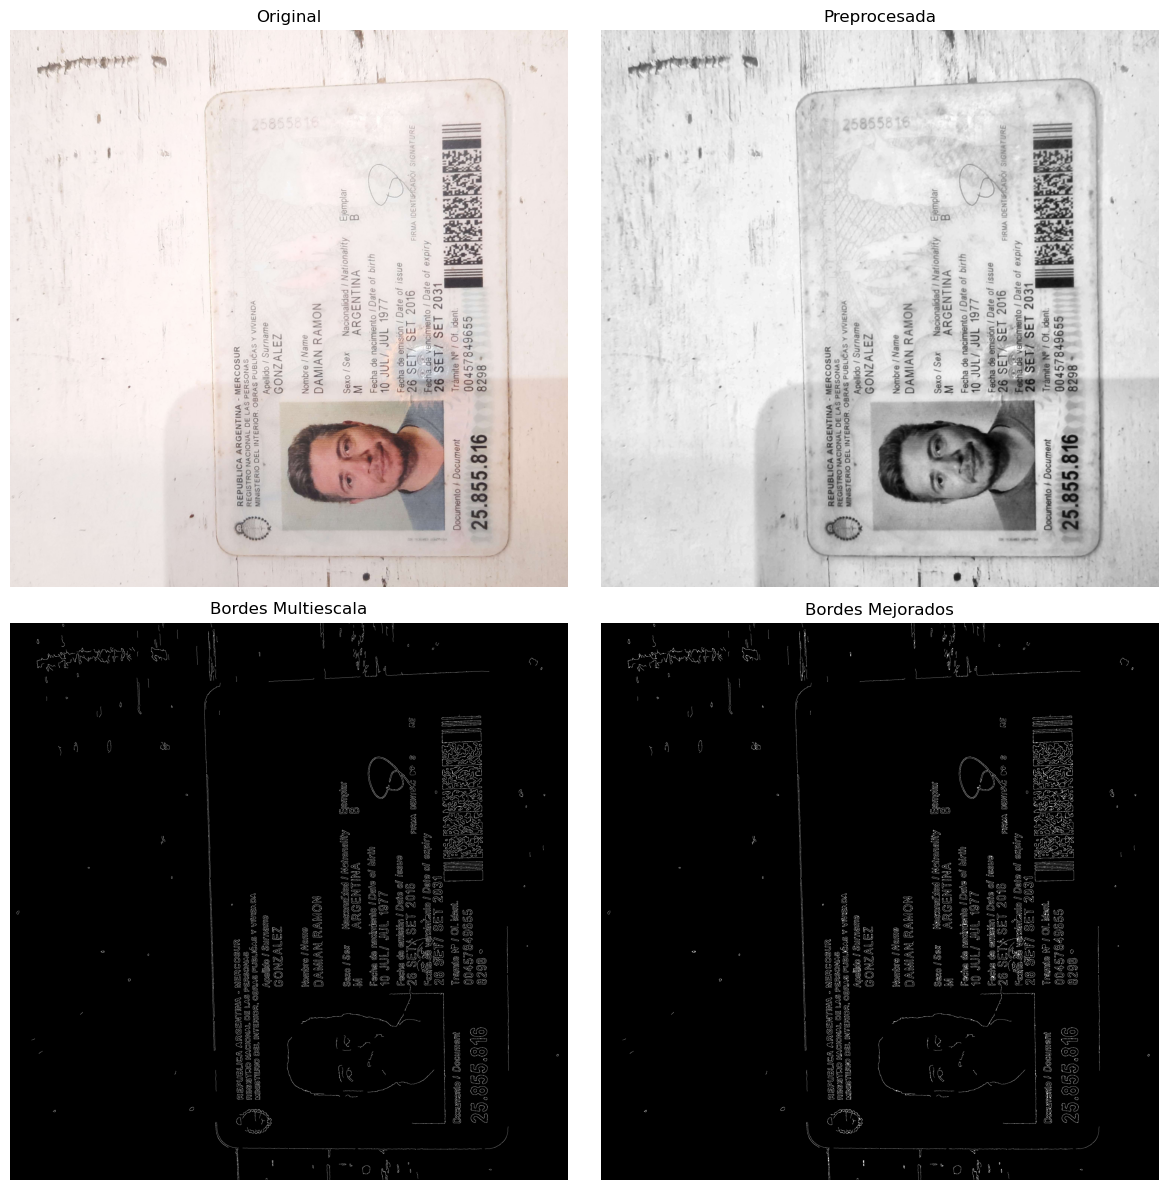

Procesamiento completado exitosamente


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def aplicar_filtros_bordes(image_path):
    """
    Aplica diferentes técnicas de filtrado para mejorar la detección de bordes
    """
    # Leer la imagen
    imagen = cv2.imread(image_path)
    if imagen is None:
        raise ValueError("No se pudo cargar la imagen")

    # Convertir a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # 1. Ecualización del histograma para mejorar el contraste
    equalizada = cv2.equalizeHist(gris)
    
    # 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(gris)
    
    # 3. Filtro bilateral para reducir ruido preservando bordes
    bilateral = cv2.bilateralFilter(gris, d=9, sigmaColor=75, sigmaSpace=75)
    
    # 4. Diferentes detectores de bordes
    # Sobel
    sobelx = cv2.Sobel(bilateral, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(bilateral, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = np.uint8(np.absolute(sobel_combined))
    
    # Laplacian
    laplacian = cv2.Laplacian(bilateral, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    
    # Canny con diferentes parámetros
    canny_bajo = cv2.Canny(bilateral, 50, 150)
    canny_alto = cv2.Canny(bilateral, 100, 200)
    
    # 5. Morfología para mejorar bordes
    kernel = np.ones((3,3), np.uint8)
    morphological = cv2.morphologyEx(canny_alto, cv2.MORPH_CLOSE, kernel)
    
    # 6. Combinación de detectores
    bordes_combinados = cv2.addWeighted(sobel_combined, 0.5, laplacian, 0.5, 0)
    
    # Mostrar resultados
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()
    
    imagenes = [
        (gris, "Original Escala de Grises"),
        (equalizada, "Ecualización de Histograma"),
        (clahe_img, "CLAHE"),
        (bilateral, "Filtro Bilateral"),
        (sobel_combined, "Sobel"),
        (laplacian, "Laplaciano"),
        (canny_bajo, "Canny (umbral bajo)"),
        (canny_alto, "Canny (umbral alto)"),
        (bordes_combinados, "Combinación de Bordes")
    ]
    
    for idx, (img, titulo) in enumerate(imagenes):
        axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(titulo)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Devolver un diccionario con todas las imágenes procesadas
    return {
        "original_gris": gris,
        "equalizada": equalizada,
        "clahe": clahe_img,
        "bilateral": bilateral,
        "sobel": sobel_combined,
        "laplacian": laplacian,
        "canny_bajo": canny_bajo,
        "canny_alto": canny_alto,
        "bordes_combinados": bordes_combinados
    }

def mejorar_deteccion_bordes(image_path):
    """
    Función que combina varios métodos para obtener una mejor detección de bordes
    """
    # Obtener la imagen y aplicar filtros iniciales
    imagen = cv2.imread(image_path)
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # 1. Preprocesamiento
    # Aplicar CLAHE para mejorar contraste
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    mejorada = clahe.apply(gris)
    
    # Reducir ruido con filtro bilateral
    sin_ruido = cv2.bilateralFilter(mejorada, d=9, sigmaColor=75, sigmaSpace=75)
    
    # 2. Detección de bordes en múltiples escalas
    bordes_escalas = []
    for sigma in [0.5, 1.0, 1.5]:  # Diferentes escalas
        blurred = cv2.GaussianBlur(sin_ruido, (0, 0), sigma)
        bordes = cv2.Canny(blurred, 50, 150)
        bordes_escalas.append(bordes)
    
    # Combinar bordes de diferentes escalas
    bordes_combinados = np.maximum.reduce(bordes_escalas)
    
    # 3. Mejora de bordes
    kernel = np.ones((3,3), np.uint8)
    bordes_mejorados = cv2.dilate(bordes_combinados, kernel, iterations=1)
    bordes_mejorados = cv2.erode(bordes_mejorados, kernel, iterations=1)
    
    # Mostrar resultado final
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.ravel()
    
    axes[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    axes[1].imshow(sin_ruido, cmap='gray')
    axes[1].set_title('Preprocesada')
    axes[1].axis('off')
    
    axes[2].imshow(bordes_combinados, cmap='gray')
    axes[2].set_title('Bordes Multiescala')
    axes[2].axis('off')
    
    axes[3].imshow(bordes_mejorados, cmap='gray')
    axes[3].set_title('Bordes Mejorados')
    axes[3].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return bordes_mejorados

# Ejemplo de uso
if __name__ == "__main__":
    try:
        imagen_path = "valid/0f4c37d3-0cf4-4c79-bb34-3a3c1d10fa7a.jpg"
        
        # Aplicar todos los filtros y mostrar comparación
        resultados = aplicar_filtros_bordes(imagen_path)
        
        # Aplicar método mejorado
        bordes_finales = mejorar_deteccion_bordes(imagen_path)
        
        print("Procesamiento completado exitosamente")
    except Exception as e:
        print(f"Error durante el procesamiento: {str(e)}")